# ¡Llena ese carrito!

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución

Escribe aquí tu plan de solución para el Paso 1. Descripción de los datos.

En este primer paso se solicitó leer y cargar la información en Dataframes correctamente; además de verificar que la información haya sido cargada correctamente. Para ello considero que es necesario realizar los siguientes pasos:
1. Importar la librería a) "pandas" para poder hacer la lectura de los archivos y cargarlos en dataframes y b) la librería de matplot para poder realizar las gráficas que se requieran.
2. Dado que los archivos tienen extensión ".csv" es necesario usar la función de pandas "read_csv".
3. Para validar si se leyeron correctamente los archivos se debe identificar i) qué tipo de separador tienen los archivos y ii) qué las cabeceras de los archivos se hayan cargado correctamente.
4. Al ejecutar por primera vez cada dataframe con el método "info" se observa que los datos están separados por el carácter ";" y que las columnas han cogido correctamente los nombres de las cabeceras de los archivos, ya que corresponde a lo indicado en el diccionario de datos. Además, dado que hay gran cantidad de datos almacenados en cada tabla es necesario especificar el atributo "show_counts" en verdadero.
5. Dado que en el punto 4 se identifico que los datos de los archivos se encuentran separados por el carácter ";", es necesario especificarlo al momento de realizar la lectura de los archivos con el argumento "sep".

In [1]:
# importar librerías
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# leer conjuntos de datos en los DataFrames
df_instacart_orders = pd.read_csv('/datasets/instacart_orders.csv', sep=';')
df_products = pd.read_csv('/datasets/products.csv', sep=';')
df_aisles = pd.read_csv('/datasets/aisles.csv', sep=';')
df_departments = pd.read_csv('/datasets/departments.csv', sep=';')
df_order_products = pd.read_csv('/datasets/order_products.csv', sep=';')

In [3]:
# mostrar información del DataFrame
df_instacart_orders.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [4]:
# mostrar información del DataFrame
df_products.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [5]:
# mostrar información del DataFrame
df_aisles.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [6]:
# mostrar información del DataFrame
df_departments.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


In [7]:
# mostrar información del DataFrame
df_order_products.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 1. Descripción de los datos.

En los dataframes se observó que hay columnas con valores nulos, adicionalmente, es necesario validar que no existan duplicados y que los tipos de datos para cada columna sean los correctos. Por lo que es necesario realizar una limpieza de los datos, ya que tomar la información tal y como está podría llevarnos a conclusiones erradas.


# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

## Plan de solución

Escribe aquí tu plan para el Paso 2. Preprocesamiento de los datos.

El plan para procesar los datos consistirá en lo siguiente:
1. Identificar valores duplicados, en caso seas filas totalmente duplicadas se tendrán que eliminar, en caso sea solo algunas columnas donde se encuentren duplicados, se tendrá que evaluar por qué se tendrían valores duplicados en esas columnas y ver si es correcto eliminarlos o darle algún tratamiento que permita reducir el número de duplicados.
2. Identificar valores ausentes (nulos), en caso sean filas totalmente duplcias se tendrán que eliminar, en caso sea solo algunas columnas, se tendrá que evaluar por qué la columna podría contener esos valores nulos y completarlos con valores más legibles que permitan manipular esas filas y sea más entendible para los usuarios.

## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `orders` data frame

In [8]:
# Revisa si hay pedidos duplicados
print('Número de pedidos duplicados: ')
print(df_instacart_orders.duplicated().sum())
print()
print('filas duplicadas:')
print(df_instacart_orders[df_instacart_orders.duplicated()==True])

Número de pedidos duplicados: 
15

filas duplicadas:
        order_id  user_id  order_number  order_dow  order_hour_of_day  \
145574    794638    50898            24          3                  2   
223105   2160484   107525            16          3                  2   
230807   1918001   188546            14          3                  2   
266232   1782114   106752             1          3                  2   
273805   1112182   202304            84          3                  2   
284038   2845099    31189            11          3                  2   
311713   1021560    53767             3          3                  2   
321100    408114    68324             4          3                  2   
323900   1919531   191501            32          3                  2   
345917   2232988    82565             1          3                  2   
371905    391768    57671            19          3                  2   
394347    467134    63189            21          3                  2  

¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común?
Sí tengo líneas duplicadas. Lo que tienen en común es que todas las ordenes duplicadas fueron registrados un miércoles ('order_dow' en 3) a las 2 am ('order_hour_of_day' en 2).

In [9]:
# Basándote en tus hallazgos,
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.
df_orders_filtered = df_instacart_orders[(df_instacart_orders['order_dow'] == 3) & (df_instacart_orders['order_hour_of_day'] == 2)]
print(df_orders_filtered)

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
4838     2766110   162084            41          3                  2   
5156     2190225   138285            18          3                  2   
15506     553049    58599            13          3                  2   
18420     382357   120200            19          3                  2   
24691     690242    77357             2          3                  2   
...          ...      ...           ...        ...                ...   
457013   3384021    14881             6          3                  2   
458816    910166   164782            18          3                  2   
459635   1680532   106435             6          3                  2   
468324    222962    54979            59          3                  2   
477526   2592344    46860            38          3                  2   

        days_since_prior_order  
4838                      16.0  
5156                      11.0  
15506                   

¿Qué sugiere este resultado?
Eliminar las filas duplicadas ya que la columna 'order_id' debe ser un valor único.

In [10]:
# Elimina los pedidos duplicados
df_instacart_orders = df_instacart_orders.drop_duplicates().reset_index(drop=True)

df_instacart_orders.info(show_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478952 entries, 0 to 478951
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478952 non-null  int64  
 1   user_id                 478952 non-null  int64  
 2   order_number            478952 non-null  int64  
 3   order_dow               478952 non-null  int64  
 4   order_hour_of_day       478952 non-null  int64  
 5   days_since_prior_order  450135 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [11]:
# Vuelve a verificar si hay filas duplicadas
print(df_instacart_orders.duplicated().sum())

0


In [12]:
# Vuelve a verificar únicamente si hay IDs duplicados de pedidos
print(df_instacart_orders['order_id'].duplicated().sum())

0


Describe brevemente tus hallazgos y lo que hiciste con ellos

Dado que es un dataframe donde se ha registrado los pedidos por cliente, solo debe existir valores únicos por código de pedido, por ello, se procedió a eliminar los pedidos duplicados.

### `products` data frame

In [13]:
# Verifica si hay filas totalmente duplicadas
print('Cantidad de filas duplicadas:')
print(df_products.duplicated().sum())

Cantidad de filas duplicadas:
0


In [14]:
# Revisa únicamente si hay ID de departamentos duplicados
print('Cantidad de duplicados en la columna "department_id":')
print(df_products['department_id'].duplicated().sum())

Cantidad de duplicados en la columna "department_id":
49673


In [15]:
# Revisa únicamente si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)

print('Cantidad de duplicados en la columna "product_name" antes de uniformizarla con mayúsculas:')
print(df_products['product_name'].duplicated().sum())

# Convertimos los nombres de la columna "product_name" a mayúsculas para uniformizar la información
df_products['product_name'] = df_products['product_name'].str.upper()

# Validamos si existen duplicados en la columna "product_name"
print('Cantidad de duplicados en la columna "product_name" después de uniformizarla a mayúsculas:')
print(df_products['product_name'].duplicated().sum())

Cantidad de duplicados en la columna "product_name" antes de uniformizarla con mayúsculas:
1257
Cantidad de duplicados en la columna "product_name" después de uniformizarla a mayúsculas:
1361


In [16]:
# Revisa si hay nombres duplicados de productos no faltantes
#print(df_products.info())
df_products_nulos = df_products.isna()
df_products_no_nulos = df_products[~df_products_nulos]

print()
print('cantidad de valores duplicados en la columna "product_name" excluyendo los valores nulos:')
print(df_products_no_nulos['product_name'].duplicated().sum())
print()

print('cantidad de valores duplicados en la columna "product_id" excluyendo los valores nulos:')
print(df_products_no_nulos['product_id'].duplicated().sum())


cantidad de valores duplicados en la columna "product_name" excluyendo los valores nulos:
1361

cantidad de valores duplicados en la columna "product_id" excluyendo los valores nulos:
0


Describe brevemente tus hallazgos y lo que hiciste con ellos.
En el dataframe "products"

En este dataframe no se encontraron valores duplicados de filas completas.
Lo que sí se encontró fueron nombres de producto duplicados; para cuantificarlos primero uniformizamos la columna "product_name" a mayúsculas y con ello, se identificaron 1,361 filas con nombres de producto duplicado; sin embargo, dado que esta columna no es un identificador único y está vinculado a un identificador único que es la columna "product_id" donde no existen duplicados, no se puede eliminar las filas duplicadas, de hacerlo estaríamos alterando la información de otros dataframes donde se encuentra el campo "product_id".

### `departments` data frame

In [17]:
# Revisa si hay filas totalmente duplicadas
print(df_departments.duplicated().sum())

0


In [18]:
# Revisa únicamente si hay IDs duplicadas de productos
print(df_departments['department_id'].duplicated().sum())

0


Describe brevemente tus hallazgos y lo que hiciste con ellos.

No se encontraron filas duplicadas por lo que no se realizo ninguna modificación.

### `aisles` data frame

In [19]:
# Revisa si hay filas totalmente duplicadas
print(df_aisles.duplicated().sum())

0


In [20]:
# Revisa únicamente si hay IDs duplicadas de productos
print(df_aisles['aisle_id'].duplicated().sum())

0


Describe brevemente tus hallazgos y lo que hiciste con ellos.

No se encontraron filas duplicadas por lo que no se realizo ninguna modificación.

### `order_products` data frame

In [21]:
# Revisa si hay filas totalmente duplicadas
print(df_order_products.duplicated().sum())

0


In [22]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso
print(df_order_products['order_id'].duplicated().sum())

4094961


Describe brevemente tus hallazgos y lo que hiciste con ellos.

No se identificaron filas completas duplicadas pero si analizamos solo la columna "order_id" se observan bastantes duplicados; sin embargo, es correcto que existan duplicados en esa columna ya que en el dataframe se almacena por fila un producto solicitado en cada pedido. Quiere decir que si un pedido contiene 5 productos, el id del pedido se verá repetido 5 veces.

## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [23]:
# Encuentra los valores ausentes en la columna 'product_name'
df_products_name_nulos = df_products[df_products['product_name'].isna()==True]
print(df_products_name_nulos)

       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]


Describe brevemente cuáles son tus hallazgos.

Se encontraron 1258 filas con valores nulos en la columna "product_name", donde en un vistazo general pareciera que corresponden a productos que se encuentran en el pasillo 100 y departamento 21.

In [24]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?
df_products_name_nulos = df_products[(df_products['product_name'].isna()==True) & (df_products['aisle_id']==100)]
print(df_products_name_nulos)

       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]


Describe brevemente cuáles son tus hallazgos.

Se agrego al filtro de valores ausentes en la columna "product_name", el filtro de "aisle_id" en 100 y se mantuvo el número de filas obtenidas en el paso anterior por lo que se comprueba que todos los productos ausentes están relacionados con el pasillo con ID 100.

In [25]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?
df_products_name_nulos = df_products[(df_products['product_name'].isna()==True) & (df_products['department_id']==21)]
print(df_products_name_nulos)

       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]


Describe brevemente cuáles son tus hallazgos.

Se agrego al filtro de valores ausentes en la columna "product_name", el filtro de "department_id" en 21 y se mantuvo el número de filas obtenidas en el paso anterior por lo que se comprueba que todos los productos ausentes están relacionados con el departamento con ID 21.

In [26]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.
df_aisle_filtered = df_aisles[df_aisles['aisle_id'] == 100]
df_department_filtered = df_departments[df_departments['department_id'] == 21]

print('pasillo:')
print(df_aisle_filtered)
print()
print('departamento:')
print(df_department_filtered)

pasillo:
    aisle_id    aisle
99       100  missing

departamento:
    department_id department
20             21    missing


Describe brevemente cuáles son tus hallazgos.

Los nombres del pasillo 100 y el departamento 21 tienen un nombre general no hace referencia a ningún pasillo ni departamento "missing".

In [27]:
# Completa los nombres de productos ausentes con 'Unknown'
df_products['product_name'].fillna('Unkown', inplace = True)
print('filas con nombres ausentes:', df_products['product_name'].isna().sum())

filas con nombres ausentes: 0


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Se identificaron las filas con nombres de productos nulos y se reemplazaron por "Unknown".

### `orders` data frame

In [28]:
# Encuentra los valores ausentes
#df_instacart_orders.info(show_counts = True)
print('filas duplicadas por columna: ')
print(df_instacart_orders.isna().sum())
print()

#como se observan valor nulos en la columna "days_since_prior_order", validamos si hay algo particular
print('filas con valores nulo en la columna "days_since_order": ')
print(df_instacart_orders[df_instacart_orders['days_since_prior_order'].isna()==True])

filas duplicadas por columna: 
order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64

filas con valores nulo en la columna "days_since_order": 
        order_id  user_id  order_number  order_dow  order_hour_of_day  \
28        133707   182261             1          3                 10   
96        787445    25685             1          6                 18   
100       294410   111449             1          0                 19   
103      2869915   123958             1          4                 16   
104      2521921    42286             1          3                 18   
...          ...      ...           ...        ...                ...   
478880   2589657   205028             1          0                 16   
478881   2222353   141211             1          2                 13   
478907   2272807   204154             1         

In [29]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?
#descartamos que correspondan a las primeras ordenes de los clientes.
print('cantidad de filas que sean la primera orden del cliente: ')
print(df_instacart_orders[(df_instacart_orders['order_number']==1)].count())
print()

#para todas las primeras ordenes de los clientes, reemplazamos la columna "days_since_prior_order" en nulo por cero
df_instacart_orders['days_since_prior_order'].fillna(0,inplace = True)

# Convertimos el tipo de dato de la columna "days_since_prior_order" de float a int.
df_instacart_orders['days_since_prior_order'] = df_instacart_orders['days_since_prior_order'].astype(int)

print('filas duplicadas por columna: ')
print(df_instacart_orders.isna().sum())

cantidad de filas que sean la primera orden del cliente: 
order_id                  28817
user_id                   28817
order_number              28817
order_dow                 28817
order_hour_of_day         28817
days_since_prior_order        0
dtype: int64

filas duplicadas por columna: 
order_id                  0
user_id                   0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64


Describe brevemente tus hallazgos y lo que hiciste con ellos.

No hay valores ausentes de filas completas pero sí hay valores ausentes en la columna "days_since_prior_order".
Se valido que las filas donde la columna "days_since_prior_order" figura en nulo corresponde solo a los primeros pedidos realizados por los clientes. Para todos las primeras ordenes de los clientes se reemplazo los nulos por cero. Para que en caso se desee realizar alguna operación matemática con esa columna o filtrar sea manipulable.

### `order_products` data frame

In [30]:
# Encuentra los valores ausentes
df_order_products.info(show_counts = True)
print('filas duplicadas por columna: ')
print(df_order_products.isna().sum())
print()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB
filas duplicadas por columna: 
order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64



In [31]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?
df_order_products['add_to_cart_order'].describe()

count    4.544171e+06
mean     8.351669e+00
std      7.080368e+00
min      1.000000e+00
25%      3.000000e+00
50%      6.000000e+00
75%      1.100000e+01
max      6.400000e+01
Name: add_to_cart_order, dtype: float64

Describe brevemente cuáles son tus hallazgos.

Se encontraron valores nulos solo en la columna "add_to_cart_order", 836 filas.
Los valores mínimo y máximo para esa columna son de 1 y 64 correspondientemente.

In [32]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'
df_products_id =  df_order_products[df_order_products['add_to_cart_order'].isna()==True]
print(df_products_id)

         order_id  product_id  add_to_cart_order  reordered
737       2449164        5068                NaN          0
9926      1968313       43867                NaN          0
14394     2926893       11688                NaN          0
16418     1717990        4142                NaN          0
30114     1959075       42828                NaN          1
...           ...         ...                ...        ...
4505662   1800005        7411                NaN          0
4511400   1633337         260                NaN          0
4517562    404157        9517                NaN          0
4534112   1673227       17835                NaN          0
4535739   1832957       17949                NaN          1

[836 rows x 4 columns]


In [33]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
# Agrupa todos los pedidos con datos ausentes por su ID de pedido.
# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.
print(df_products_id.groupby(by = 'order_id')['product_id'].count())
print()
print('valor mínimo: ', df_products_id.groupby(by = 'order_id')['product_id'].count().min())
print('valor máximo: ', df_products_id.groupby(by = 'order_id')['product_id'].count().max())

order_id
9310        1
61355      63
102236     31
129627      5
165801      6
           ..
2999801     6
3125735    22
3308010    51
3347453     7
3383594     5
Name: product_id, Length: 70, dtype: int64

valor mínimo:  1
valor máximo:  63


Describe brevemente cuáles son tus hallazgos.

Los pedidos con valores ausentes no tienen más de 64 productos. El mínimo es 1 y el máximo 63.

In [34]:
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.

# Complentamos los valores nulos del campo "add_to_cart_order" con "999".
df_order_products['add_to_cart_order'].fillna(999, inplace=True)

# Convertimos el tipo de dato de la columna "add_to_cart_order" de float a int.
df_order_products['add_to_cart_order'] = df_order_products['add_to_cart_order'].astype(int)

# Validamos si el tipo de datos de la columna "add_to_cart_order" se convirtio a int correctamente.
df_order_products.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype
---  ------             --------------    -----
 0   order_id           4545007 non-null  int64
 1   product_id         4545007 non-null  int64
 2   add_to_cart_order  4545007 non-null  int64
 3   reordered          4545007 non-null  int64
dtypes: int64(4)
memory usage: 138.7 MB


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Se completaron con valores 999 todas los valores en nulo de la columna "add_to_cart_order". Posteriormente, se hizo el cambio de tipo de dato de la columna "add_to_cart_order" de float a int.

## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 2. Preprocesamiento de los datos

Luego de realizar el preprocesamiento de los datos de los dataframes se concluye lo siguiente:
1. En el dataframe "instacart_orders" donde se registran los pedidos por cliente, se encontraron 15 filas completamente duplicadas y que correspondían a un momento en específico (miércoles a las 2 am), dado que el valor de "order_id" debe ser único se procedió a eliminar las filas duplicadas. Adicionalmente, se identifico que las primeras ordenes de los clientes tenían la columna "days_since_prior_order" con valores en nulo, por lo cual se optó por darle el valor de 0 para que sea manipulable.
2. En el dataframe "products" se encontró valores no uniformizados en la columna "product_name" por lo que se optó por uniformizarlo con valores en mayúscula. Posteriormente, se identificó que existían valores no nulos con nombres de producto duplicados pero que correspondian a códigos de producto únicos, por ello, no se optó por eliminarlos ya que de realizarlo podría alterar la información almacenada en los dataframes que contienen esa columna (ej. dataframe order_products). Adicionalmente, también se identificaron 1,258 valores ausentes en la columna "product_name" que correspondían al pasillo 100 y departamento 21, donde ambos tienen como descripción "missing", por lo que se optó por reemplazar los valores nulos de la columna "product_name" por "Unknown".
3. En el dataframe "order_products" se encontraron varios valores duplicados, resultado que es correcto ya que se registra en cada fila un producto por pedido (ej. para un pedido de 5 productos, se verán 5 filas con el id pedido y con 5 ids de productos distintos). Posterior a ello se identificaron 836 valores ausentes en la columna "add_to_cart_order", donde se identificaron los valores ausentes con 999.
4. En el dataframe "aisles" no se encontraron filas duplicadas ni con valores ausentes por lo que no se realizaron cambios.
5. En el dataframe "departments" no se encontraron filas duplicadas ni con valores ausentes por lo que no se realizaron cambios.

# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] Fácil (deben completarse todos para aprobar)

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [35]:
df_instacart_orders['order_hour_of_day'].describe()

count    478952.000000
mean         13.447034
std           4.224567
min           0.000000
25%          10.000000
50%          13.000000
75%          16.000000
max          23.000000
Name: order_hour_of_day, dtype: float64

In [36]:
df_instacart_orders['order_dow'].describe()

count    478952.000000
mean          2.775051
std           2.045901
min           0.000000
25%           1.000000
50%           3.000000
75%           5.000000
max           6.000000
Name: order_dow, dtype: float64

Escribe aquí tus conclusiones

Usamos el método describe para validar los rangos de los valores en las columnas "order_hour_of_day" y "order_dow". Se valido que los valores de ambas columnas se encuentran dentro del rango valido.

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

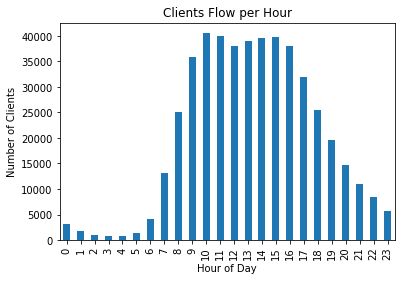

In [37]:
df_people_per_hour = df_instacart_orders.groupby(by = 'order_hour_of_day')['user_id'].count()

# Graficamos
df_people_per_hour.plot(
        xlabel = 'Hour of Day',
        ylabel = 'Number of Clients',
        kind = 'bar',
        title = 'Clients Flow per Hour')

plt.show()

Escribe aquí tus conclusiones

Se observa que a partir de las 5 am se incrementa la afluencia de clientes haciendo ordenes de pedidos hasta las 15 horas. Adicionalmente, podemos afirmar que las horas entre 10 y 16 son las horas pico con mayor afluencia de clientes.

### [A3] ¿Qué día de la semana compran víveres las personas?

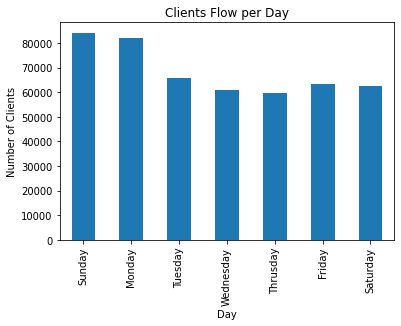

In [38]:
df_orders_per_day = df_instacart_orders.groupby(by = 'order_dow')['user_id'].count()

# Renombramos los índices para que en vez de que figuren números, se muestre la descripción correspondiente.
df_orders_per_day.rename(index={0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thrusday', 5: 'Friday', 6: 'Saturday'}, inplace=True)

# Graficamos
df_orders_per_day.plot(
        x = 'order_dow',
        xlabel = 'Day',
        ylabel = 'Number of Clients',
        kind = 'bar',
        title = 'Clients Flow per Day')

plt.show()

Escribe aquí tus conclusiones

En la gráfica se observa que existe mayor afluencia de clientes los domingos y lunes; de martes a sábado es más bajo; siendo el jueves el día con afluencia más baja de clientes.

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

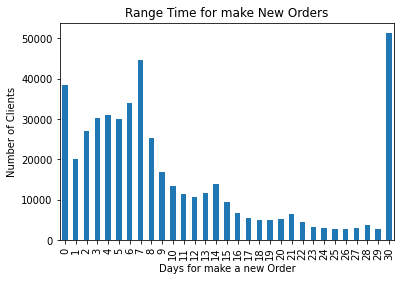

Clientes que esperaron 7 días para hacer un siguiente pedido: 44577
Clientes que esperaron 30 días para hacer un siguiente pedido: 51337


In [39]:
df_days_waiting_per_client = df_instacart_orders.groupby(by = 'days_since_prior_order')['user_id'].count()

# Graficamos
df_days_waiting_per_client.plot(
        x = 'days_since_prior_order',
        xlabel = 'Days for make a new Order',
        ylabel = 'Number of Clients',
        kind = 'bar',
        title = 'Range Time for make New Orders')

plt.show()

print('Clientes que esperaron 7 días para hacer un siguiente pedido:', df_days_waiting_per_client[7])
print('Clientes que esperaron 30 días para hacer un siguiente pedido:', df_days_waiting_per_client[30])


Escribe aquí tus conclusiones

Se observa que la mayoría los clientes suele realizar otro pedido después de 30 días, seguido de clientes que suelen esperar 7 días para hacer un nuevo pedido.
Por otro lado, se observa que una baja cantidad de clientes suelen realizar otro pedido después de 29 días.


# [B] Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

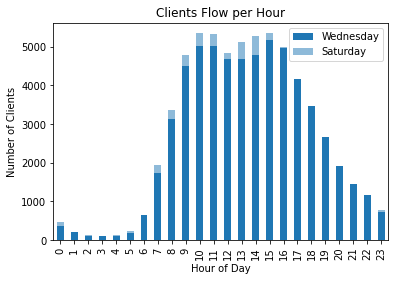

In [40]:
df_people_per_hour_wednesday = df_instacart_orders[df_instacart_orders['order_dow']==3].groupby(by = 'order_hour_of_day')['user_id'].count()
df_people_per_hour_saturday = df_instacart_orders[df_instacart_orders['order_dow']==5].groupby(by = 'order_hour_of_day')['user_id'].count()

# Graficamos
df_people_per_hour_wednesday.plot(
        xlabel = 'Hour of Day',
        ylabel = 'Number of Clients',
        kind = 'bar',
        title = 'Clients Flow per Hour')

df_people_per_hour_saturday.plot(
        xlabel = 'Hour of Day',
        ylabel = 'Number of Clients',
        kind = 'bar',
        title = 'Clients Flow per Hour',
        alpha = 0.5)

plt.legend(['Wednesday','Saturday'])

plt.show(['df_people_per_hour_wednesday','df_people_per_hour_saturday'])

Escribe aquí tus conclusiones

Se observa que los días miércoles y domingos tienen la afluencia de clientes es mayor en los rangos de horas de 10 a 16; siendo el rango de 0 a 5 el de menor afluencia de clientes. Adicionalmente, se observa que la tendencia de afluencia de clientes en los rangos de 17 a 23 es muy similar en ambos días.

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

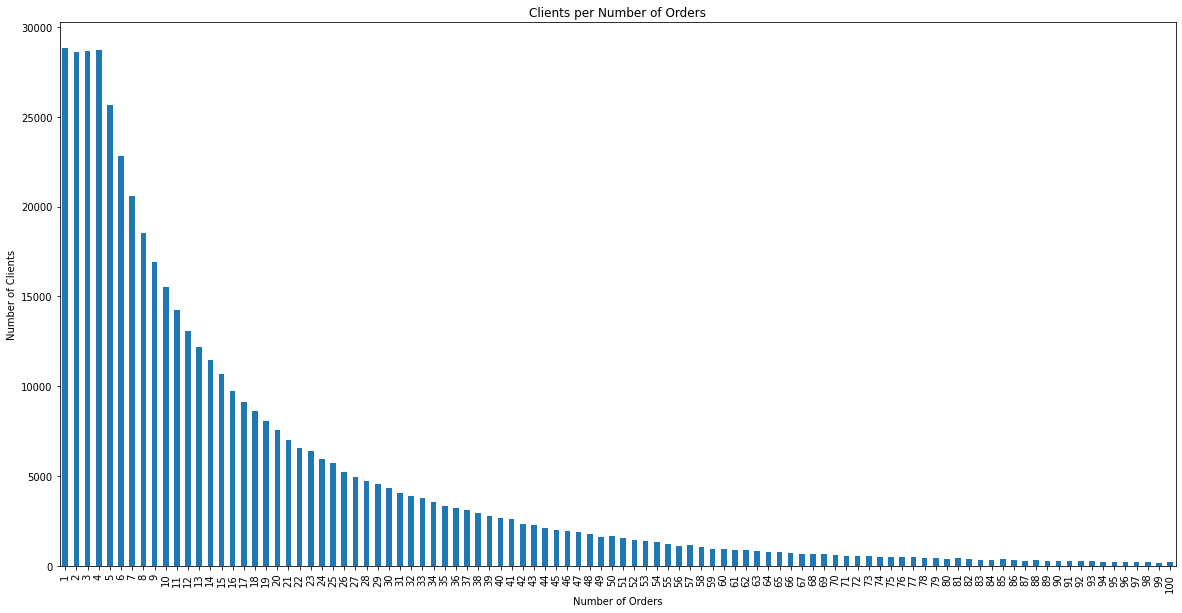

clientes que hicieron 1 pedido:  28817
clientes que hicieron 2 pedidos:  28633
clientes que hicieron 3 pedidos:  28685


In [41]:
df_orders_per_client = df_instacart_orders.groupby(by = 'order_number')['user_id'].count()

# Graficamos
df_orders_per_client.plot(
        xlabel = 'Number of Orders',
        ylabel = 'Number of Clients',
        kind = 'bar',
        title = 'Clients per Number of Orders',
        figsize = (20,10)
)

plt.show()

print('clientes que hicieron 1 pedido: ', df_orders_per_client[1])
print('clientes que hicieron 2 pedidos: ', df_orders_per_client[2])
print('clientes que hicieron 3 pedidos: ', df_orders_per_client[3])

Escribe aquí tus conclusiones

La distribución para el número de pedidos es geométrica. Donde a medida que se incrementa el número de pedidos realizados el número de clientes se reduce.

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [42]:
# Definimos un dataframe donde podamos cuantificar la cantidad de productos por pedido.
df_products_per_order = df_order_products.groupby(by = 'product_id')['order_id'].count()

# Combinamos el dataframe "df_products_per_order" y el dataframe "df_products" para listar los 20 Ids y nombre de productos más populares.
df_merged = df_products.merge(df_products_per_order, on = 'product_id', how='inner').sort_values(by = 'order_id', ascending = False).head(20)

print(df_merged[{'product_name','product_id'}].reset_index(drop = True))


    product_id              product_name
0        24852                    BANANA
1        13176    BAG OF ORGANIC BANANAS
2        21137      ORGANIC STRAWBERRIES
3        21903      ORGANIC BABY SPINACH
4        47209      ORGANIC HASS AVOCADO
5        47766           ORGANIC AVOCADO
6        47626               LARGE LEMON
7        16797              STRAWBERRIES
8        26209                     LIMES
9        27845        ORGANIC WHOLE MILK
10       27966       ORGANIC RASPBERRIES
11       22935      ORGANIC YELLOW ONION
12       24964            ORGANIC GARLIC
13       45007          ORGANIC ZUCCHINI
14       39275       ORGANIC BLUEBERRIES
15       49683            CUCUMBER KIRBY
16       28204        ORGANIC FUJI APPLE
17        5876             ORGANIC LEMON
18        8277  APPLE HONEYCRISP ORGANIC
19       40706    ORGANIC GRAPE TOMATOES


Escribe aquí tus conclusiones
Entre los 20 productos más populares se encuentran frutas y verduras. Donde los productos más vendidos son plátanos y fresas (TOP 2).

# [C] Difícil (deben completarse todos para aprobar)

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

En promedio una persona compra  10.0  artículos en un pedido.

La distribución de las compras que realizan las personas en promedio es:


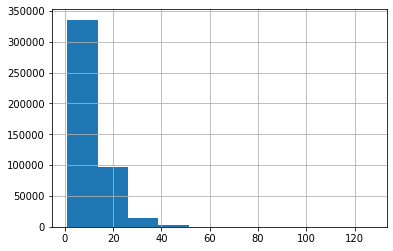

In [43]:
df_products_buyer = df_order_products.groupby('order_id')['product_id'].count()

print('En promedio una persona compra ', round(df_products_buyer.mean(),0), ' artículos en un pedido.')
print()
print('La distribución de las compras que realizan las personas en promedio es:')

df_products_buyer.hist(bins = 10, )

plt.show()


Escribe aquí tus conclusiones

En promedio una persona compra 10 artículos en un pedido. Por otro lado, la gráfica muestra una distribución rectangular donde se observa que el mayor porcentaje de pedidos se realizaron con 1 a 20 artículos.

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [44]:
# Definimos un dataframe donde podamos cuantificar la cantidad de productos por pedido y que hayan sido vueltos a pedir.
df_products_per_order = df_order_products[df_order_products['reordered']==1].groupby(by = 'product_id')['order_id'].count()

# Combinamos el dataframe "df_products_per_order" y el dataframe "df_products" para listar los 20 Ids y nombre de productos más populares.
df_merged = df_products.merge(df_products_per_order, on = 'product_id', how='inner').sort_values(by = 'order_id', ascending = False).head(20)

print(df_merged[{'product_name','product_id'}].reset_index(drop = True))

    product_id              product_name
0        24852                    BANANA
1        13176    BAG OF ORGANIC BANANAS
2        21137      ORGANIC STRAWBERRIES
3        21903      ORGANIC BABY SPINACH
4        47209      ORGANIC HASS AVOCADO
5        47766           ORGANIC AVOCADO
6        27845        ORGANIC WHOLE MILK
7        47626               LARGE LEMON
8        27966       ORGANIC RASPBERRIES
9        16797              STRAWBERRIES
10       26209                     LIMES
11       22935      ORGANIC YELLOW ONION
12       24964            ORGANIC GARLIC
13       45007          ORGANIC ZUCCHINI
14       49683            CUCUMBER KIRBY
15       28204        ORGANIC FUJI APPLE
16        8277  APPLE HONEYCRISP ORGANIC
17       39275       ORGANIC BLUEBERRIES
18        5876             ORGANIC LEMON
19       49235       ORGANIC HALF & HALF


Escribe aquí tus conclusiones

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

       reordered_ratio                                       product_name
0             0.564286                         CHOCOLATE SANDWICH COOKIES
1             0.000000                                   ALL-SEASONS SALT
2             0.738095               ROBUST GOLDEN UNSWEETENED OOLONG TEA
3             0.510204  SMART ONES CLASSIC FAVORITES MINI RIGATONI WIT...
4             0.500000                     PURE COCONUT WATER WITH ORANGE
...                ...                                                ...
45568         0.800000                      HIGH PERFORMANCE ENERGY DRINK
45569         0.430556                      ORIGINAL PANCAKE & WAFFLE MIX
45570         0.416667    ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR
45571         0.440000                             SPRING WATER BODY WASH
45572         0.333333                            BURRITO- STEAK & CHEESE

[45573 rows x 2 columns]


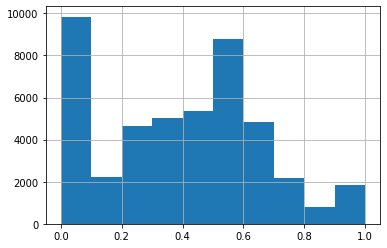


Cantidad de artículos que los clientes solo los han pedido 1 vez:  9345
Cantidad de artículos que fueron vueltos a pedir por todos los clientes:  1809


In [45]:
df_times_ordered = df_order_products.pivot_table(
                    index = 'product_id',
                    columns = 'reordered',
                    values = 'order_id',
                    aggfunc = 'count'
    ).fillna(0)


df_times_ordered['reordered_ratio'] = df_times_ordered[1]/(df_times_ordered[0]+df_times_ordered[1])

df_times_ordered_merged = df_times_ordered.merge(df_products,how = 'inner', on = 'product_id')

print(df_times_ordered_merged[{'product_name','reordered_ratio'}].reset_index(drop = True))

df_times_ordered_merged['reordered_ratio'].hist()
plt.show()

print()
print('Cantidad de artículos que los clientes solo los han pedido 1 vez: ', df_times_ordered_merged['product_name'][df_times_ordered_merged['reordered_ratio'] == 0].count())
print('Cantidad de artículos que fueron vueltos a pedir por todos los clientes: ', df_times_ordered_merged['product_name'][df_times_ordered_merged['reordered_ratio'] == 1].count())

Escribe aquí tus conclusiones

Se observa que 9,345 productos (21% del total) han sido ordenados solo una vez y que los clientes que lo pidieron no lo han vuelto a ordenar, para este grupo de productos sería interesante averiguar mayor detalle del por qué no fueron reordenados, estos productos estarían en la mira ya que podrían salir de la lista de productos al no tener acogida por la cliente. Por otro lado se encontro que 1,809 productos (4% del total) fueron reordernados por todos los clientes que lo pidieron una vez, este grupo de productos son los que mayor acogida y fidelidad tuvo la clientela por lo que sería interesante entrar a detalle qué características tienen en común y siempre tener stock ya que no tenerlo sería una perdida segura para la tienda.


### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [46]:
df_orders_merged = df_instacart_orders.merge(df_order_products,how = 'inner', on = 'order_id')



df_times_ordered_clients = df_orders_merged.pivot_table(
                    index = 'user_id',
                    columns = 'reordered',
                    values = 'product_id',
                    aggfunc = 'count'
    ).fillna(0)


df_times_ordered_clients['reordered_ratio'] = df_times_ordered_clients[1]/(df_times_ordered_clients[0]+df_times_ordered_clients[1])

print(df_times_ordered_clients.reset_index(drop=True))
print()
print('En promedio, el ', round(df_times_ordered_clients['reordered_ratio'].mean(),2), 'de productos pedidos por los clientes es vuelto a ordenar.')


reordered     0     1  reordered_ratio
0          25.0   1.0         0.038462
1           2.0   0.0         0.000000
2           4.0   8.0         0.666667
3           4.0   0.0         0.000000
4           1.0  13.0         0.928571
...         ...   ...              ...
149621     21.0   6.0         0.222222
149622      6.0  15.0         0.714286
149623      5.0  41.0         0.891304
149624     38.0  87.0         0.696000
149625     17.0   8.0         0.320000

[149626 rows x 3 columns]

En promedio, el  0.49 de productos pedidos por los clientes es vuelto a ordenar.


Escribe aquí tus conclusiones

Se observa que en promedio los clientes reordenan el 50% de los productos que ordenaron alguna vez.

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [47]:
#df_products_first = df_order_products[df_order_products['add_to_cart_order'] == 1]['product_id'].groupby('product_id')['product_id'].count()

df_products_first = df_order_products[df_order_products['add_to_cart_order'] == 1].pivot_table(
                    index = 'product_id',
                    columns = 'add_to_cart_order',
                    values = 'order_id',
                    aggfunc = 'count'
    ).sort_values(by = 1, ascending = False).head(20)


df_products_first_top_20 = df_products_first.merge(df_products, how = 'inner', on = 'product_id')

df_products_first_top_20.rename(columns = {1 : 'quantity_products'}, inplace = True)

print(df_products_first_top_20[{'product_id','product_name','quantity_products'}])



    quantity_products  product_id                 product_name
0               15562       24852                       BANANA
1               11026       13176       BAG OF ORGANIC BANANAS
2                4363       27845           ORGANIC WHOLE MILK
3                3946       21137         ORGANIC STRAWBERRIES
4                3390       47209         ORGANIC HASS AVOCADO
5                3336       21903         ORGANIC BABY SPINACH
6                3044       47766              ORGANIC AVOCADO
7                2336       19660                 SPRING WATER
8                2308       16797                 STRAWBERRIES
9                2024       27966          ORGANIC RASPBERRIES
10               1914       44632   SPARKLING WATER GRAPEFRUIT
11               1797       49235          ORGANIC HALF & HALF
12               1737       47626                  LARGE LEMON
13               1733         196                         SODA
14               1397       38689     ORGANIC REDUCED F

Escribe aquí tus conclusiones

Se observa que entre los 20 principales productos que los clientes colocan en sus carritos de compra se encuentran plátanos, leche orgánica, fresas y palta (Top 5).

### Conclusion general del proyecto:

La información manejada en el proyecto de la plataforma "Instacart" ha sido súper interesante.
Por el volumen de datos en los dataframes se podría inferir que se trata de una plataforma que tiene buena acogida por los clientes.
Y que la cantidad de productos que se compra es súper variada.

Por otro lado, mi experiencia con este proyecto ha sido muy satisfactoria porque me hizo sentir que hice un ejercicio que un analista de datos haría en su día a día.